In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

<br>
<br>

#### 1. (당뇨병 진행도) 데이터 읽어들이기

In [2]:
diabetes = datasets.load_diabetes()

####  그 외 sklearn 의 datasets

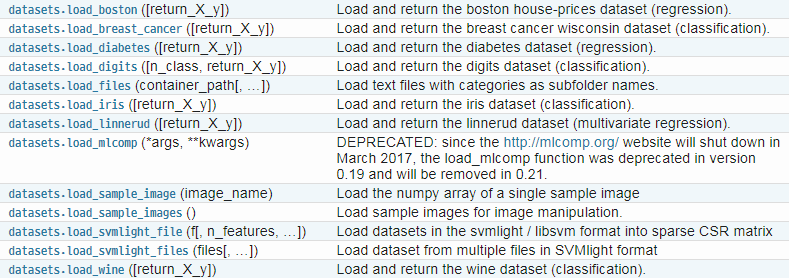

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [5]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename']

In [6]:
df = pd.DataFrame(diabetes.data) # Array to dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


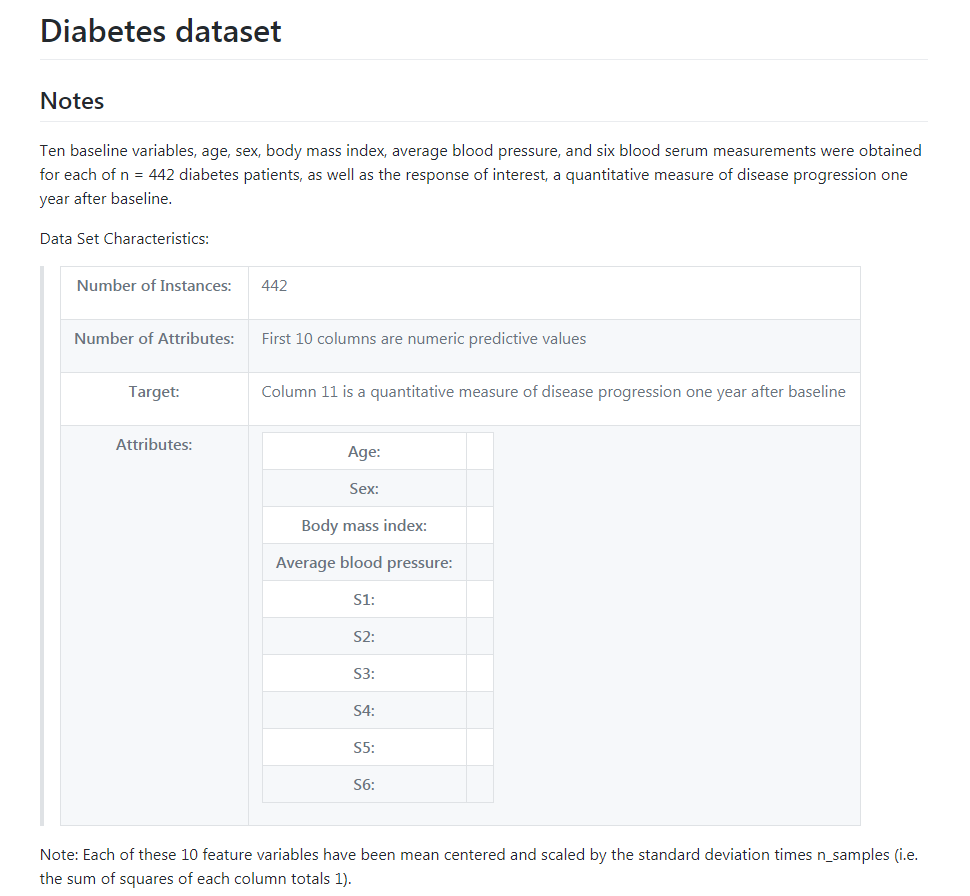

- 나이, 성별, BMI(body mass index) 지수, 혈압 및 6개의 혈청 검사 수치
- -> 1년 후의 당뇨병 진행도

#### 기본적으로 array 형태로 저장되어 있으므로 바로 활용 가능

In [7]:
print(diabetes.data.shape) # '모양'
print(diabetes.target.shape)

(442, 10)
(442,)


In [8]:
diabetes.data[0, :]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

<br>
<br>

#### 2. Feature 선택하기

In [9]:
# Use only one feature 

diabetes_X = diabetes.data[:, 2:3] # Body Mass Index, Mean centered and scaled by the standard deviation time n_samples (Sum of squares of each column totals 1)
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [10]:
diabetes_Y = diabetes.target
diabetes_Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

<br>
<br>

#### 3. Training & Test set 으로 나눠주기

In [12]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_X, diabetes_Y, test_size=0.3, random_state=0)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 1)
(133, 1)
(309,)
(133,)


<br>
<br>

#### 4. 비어있는 모델 객체 만들기

In [14]:
# Create linear regression object 
model = linear_model.LinearRegression()

In [15]:
dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'RandomizedLasso',
 'RandomizedLogisticRegression',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'bayes',
 'cd_fast',
 'coordinate_descent',
 'enet_path',
 'huber',
 'lars_path',
 'lasso_path',
 'lasso_stability_path',

<br>
<br>

#### 5. 모델 객체 학습시키기 (on training data)

In [16]:
# Train the model using the training sets

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
print('Coefficients: ', model.coef_)

Coefficients:  [1013.17358257]


<br>
<br>

#### 6. 학습이 끝난 모델 테스트하기 (on test data)

In [18]:
# Train 데이터에 대한 Model 의 Mean squared error 
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))

MSE(Training data) :  3892.7208150824304


In [19]:
# Test 데이터에 대한 Model 의 Mean squared error 
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

MSE(Test data) :  3921.3720274248517


In [20]:
# Square root of error
np.sqrt( mean_squared_error(model.predict(x_test), y_test) )

62.62085936351282

<br>
<br>

#### 7. 모델 시각화

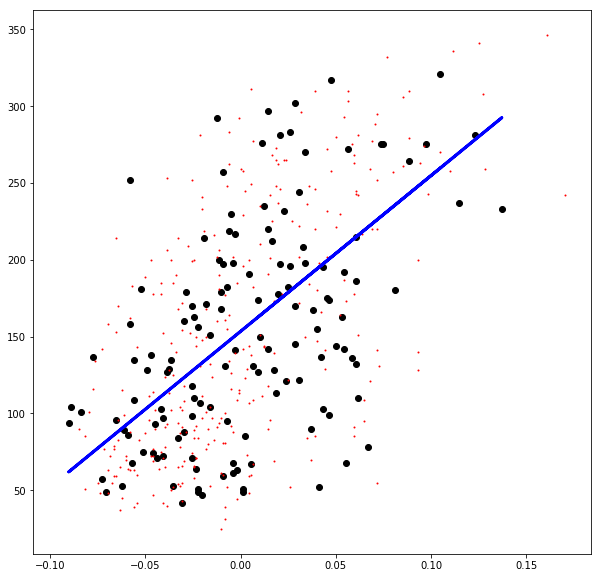

In [21]:
plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()

<br>
<br>

#### Practice. 더 좋은 성능을 보이는 Feature 를 찾아보세요!

MSE(Training data) :  3892.7208150824304
MSE(Test data) :  3921.3720274248517


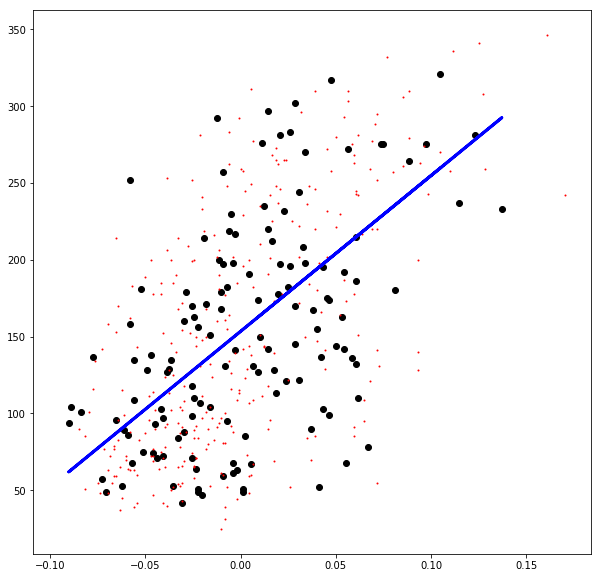

In [22]:
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

# 1. Prepare the data (array!)
diabetes = datasets.load_diabetes()

# 2. Feature selection
diabetes_X = diabetes.data[:, 2:3] 
diabetes_Y = diabetes.target

# 3. Train/Test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_X, diabetes_Y, test_size=0.3, random_state=0)

# 4. Create model object 
model = linear_model.LinearRegression()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

# 7. Visualize the model
plt.figure(figsize=(10, 10))
plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data
plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line
plt.show()